## Libraries and Imports

In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,json
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
os.makedirs('Data/',exist_ok=True) 
# Confirm folder created
os.listdir("Data/")

[]

In [6]:
info_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS1ZstYLwFgwhZnqDsPjtnlHYhJp_cmW55J8JD5mym0seRsaem3px7QBtuFF0LiI7z1PLCkVKAkdO7J/pub?output=csv'
powers_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSzdWOBaXOoz52vPmCFV5idNlDBohLY1Lsbc1IfZIZQ7cV_aNB2wYBfhF49uE1TaO1B5MQCGWiNrFfd/pub?output=csv'

In [7]:
info_df = pd.read_csv(info_url)

In [8]:
info_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [9]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [10]:
powers_df = pd.read_csv(powers_url)

In [11]:
powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [12]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


# 1. 

### Transformations

In [13]:
info_df['Hero|Publisher'].head(2)

0            A-Bomb|Marvel Comics
1    Abe Sapien|Dark Horse Comics
Name: Hero|Publisher, dtype: object

In [14]:

info_df[['Hero', 'Publisher']] = info_df['Hero|Publisher'].str.split('|', expand=True)
info_df

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics
...,...,...,...,...,...,...,...,...,...,...
458,Yellowjacket|Marvel Comics,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}",Yellowjacket,Marvel Comics
459,Yellowjacket II|Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}",Yellowjacket II,Marvel Comics
460,Yoda|George Lucas,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}",Yoda,George Lucas
461,Zatanna|DC Comics,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}",Zatanna,DC Comics


In [15]:
# drop original Hero|Publisher column
info_df.drop(columns = 'Hero|Publisher', inplace = True)
info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


### Splits

In [16]:
type(info_df['Measurements'][0])

str

In [17]:
# replace the single quote with double quote
info_df['Measurements'] = info_df['Measurements'].str.replace("'", '"')
info_df['Measurements']
# apply json.loads to full column
info_df['Measurements'] = info_df['Measurements'].apply(json.loads)
info_df['Measurements'].head(2)

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
Name: Measurements, dtype: object

In [18]:
test_measure = info_df.loc[0, 'Measurements']
print(type(test_measure))
test_measure

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [19]:
ht_wt = info_df['Measurements'].apply(pd.Series)
ht_wt

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [20]:
# concat long_lat with original dataframe
info_df = pd.concat((info_df, ht_wt), axis = 1)
info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [21]:
# drop measurements column
info_df.drop(columns = 'Measurements', inplace = True)
info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [22]:
# Height and Weight need to be numeric
info_df.rename(columns={'Height': 'Height (cm)', 'Weight': 'Weight (kg)'},
              inplace=True)
info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


#### Height

In [23]:
type(info_df['Height (cm)'][0])

str

In [24]:
# remove empty space and 'cm' from 'Height (cm)'

to_replace = [' ', 'cm']

for char in to_replace:
    info_df['Height (cm)'] = info_df['Height (cm)'].str.replace(char, '', regex=False)
info_df.head(2)


,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0 kg


In [25]:
info_df['Height (cm)'] = info_df['Height (cm)'].astype('float')
type(info_df['Height (cm)'][0])

numpy.float64

#### Weight

In [26]:
type(info_df['Weight (kg)'][0])

str

In [27]:
# remove empty space and cm from Weight (cm)

to_replace = [' ', 'kg']

for char in to_replace:
    info_df['Weight (kg)'] = info_df['Weight (kg)'].str.replace(char, '', regex=False)
info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0


In [28]:
info_df['Weight (kg)'] = info_df['Weight (kg)'].astype('float')
type(info_df['Weight (kg)'][0])

numpy.float64

## Powers

In [29]:
powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [30]:
print(type(powers_df['Powers'][0]))
powers_df['Powers'][0]

<class 'str'>


'Agility,Super Strength,Stamina,Super Speed'

In [31]:
powers_df['Powers_S'] = powers_df['Powers'].str.split(',')

In [32]:
print(type(powers_df['Powers_S'][0]))
powers_df['Powers_S']

<class 'list'>


0        [Agility, Super Strength, Stamina, Super Speed]
1      [Accelerated Healing, Durability, Longevity, S...
2      [Agility, Accelerated Healing, Cold Resistance...
3                                   [Lantern Power Ring]
4      [Accelerated Healing, Intelligence, Super Stre...
                             ...                        
662               [Flight, Energy Blasts, Size Changing]
663    [Cold Resistance, Durability, Longevity, Super...
664    [Agility, Stealth, Danger Sense, Marksmanship,...
665    [Cryokinesis, Telepathy, Magic, Fire Control, ...
666    [Super Speed, Intangibility, Time Travel, Time...
Name: Powers_S, Length: 667, dtype: object

## Encoding

In [33]:
exploded = powers_df.explode('Powers_S')
exploded.head()

,hero_names,Powers,Powers_S
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [34]:
## saving the unique values from the exploded column
cols_to_make = exploded['Powers_S'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [35]:
# creat a new column for each of our unique values and indicate true or
# false based on original value
for col in cols_to_make:
    powers_df[col] = powers_df['Powers'].str.contains(col)
powers_df.head()

,hero_names,Powers,Powers_S,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
#drop Powers and Powers_S
powers_df.drop(columns=['Powers', 'Powers_S'], inplace=True)
powers_df.head(2)

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


# 2.

In [37]:
df= pd.merge(info_df, powers_df, left_on='Hero', right_on='hero_names')
df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False


In [38]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Data columns (total 178 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    Gender                        object 
 1    Race                          object 
 2    Alignment                     object 
 3    Hair color                    object 
 4    Eye color                     object 
 5    Skin color                    object 
 6    Hero                          object 
 7    Publisher                     object 
 8    Height (cm)                   float64
 9    Weight (kg)                   float64
 10   hero_names                    object 
 11   Agility                       bool   
 12   Super Strength                bool   
 13   Stamina                       bool   
 14   Super Speed                   bool   
 15   Accelerated Healing           bool   
 16   Durability                    bool   
 17   Longevity                     bool   
 18   Camoufla

In [39]:
df.drop(columns='hero_names', inplace=True)
df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False


### Evaluate and Compare

In [40]:
np.where(cols_to_make == 'Super Speed')

(array([3], dtype=int64),)

In [41]:
yes_speed = df['Super Speed'] == True
df_speed = df[yes_speed]
df_speed

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
5,Male,Human,good,Blond,blue,Unknown,Adam Strange,DC Comics,185.0,88.0,...,False,False,False,False,False,False,False,False,False,False
8,Male,Unknown,bad,White,blue,Unknown,Air-Walker,Marvel Comics,188.0,108.0,...,False,False,False,False,False,False,False,False,False,False
9,Male,Cyborg,bad,Black,brown,Unknown,Ajax,Marvel Comics,193.0,90.0,...,False,False,False,False,False,False,False,False,False,False
10,Male,Unknown,good,Blond,blue,Unknown,Alan Scott,DC Comics,180.0,90.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Female,Demi-God,good,Blond,blue,Unknown,Wonder Girl,DC Comics,165.0,51.0,...,False,False,False,False,False,False,False,False,False,False
454,Male,Unknown,good,Black,red,Unknown,Wonder Man,Marvel Comics,188.0,171.0,...,False,False,False,False,False,False,False,False,False,False
455,Female,Amazon,good,Black,blue,Unknown,Wonder Woman,DC Comics,183.0,74.0,...,False,False,False,False,False,False,False,False,False,False
460,Male,Yoda's species,good,White,brown,green,Yoda,George Lucas,66.0,17.0,...,False,False,False,False,False,False,False,False,False,False


In [42]:
no_speed_df = df[~yes_speed]
no_speed_df

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False
6,Male,Human,good,Brown,brown,Unknown,Agent Bob,Marvel Comics,178.0,81.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Female,Mutant / Clone,good,Black,green,Unknown,X-23,Marvel Comics,155.0,50.0,...,False,False,False,False,False,False,False,False,False,False
457,Male,Unknown,good,Brown,blue,Unknown,X-Man,Marvel Comics,175.0,61.0,...,False,False,False,False,False,False,False,False,False,False
458,Male,Human,good,Blond,blue,Unknown,Yellowjacket,Marvel Comics,183.0,83.0,...,False,False,False,False,False,False,False,False,False,False
459,Female,Human,good,Strawberry Blond,blue,Unknown,Yellowjacket II,Marvel Comics,165.0,52.0,...,False,False,False,False,False,False,False,False,False,False


In [43]:
avg_yes_weight = df_speed['Weight (kg)'].mean().round(2)
avg_no_weight = no_speed_df['Weight (kg)'].mean().round(2)
print(avg_yes_weight)
print(avg_no_weight)

129.4
101.77


In [44]:
print(f'The average weight of heroes with super speed is {avg_yes_weight}')
print(f'The average weight of heroes without super speed is {avg_no_weight}')
print(f'The difference in weight for those with super speed is \
{(avg_yes_weight - avg_no_weight).round(2)} kg')

The average weight of heroes with super speed is 129.4
The average weight of heroes without super speed is 101.77
The difference in weight for those with super speed is 27.63 kg


#### What is the average height of heroes for each publisher?

In [45]:
pub_height = df.groupby('Publisher')['Height (cm)'].mean().round(2).sort_values(ascending = False)
pub_height

Publisher
Image Comics         211.00
Marvel Comics        191.55
DC Comics            181.92
Star Trek            181.50
Team Epic TV         180.75
Unknown              178.00
Dark Horse Comics    176.91
Shueisha             171.50
George Lucas         159.60
Name: Height (cm), dtype: float64

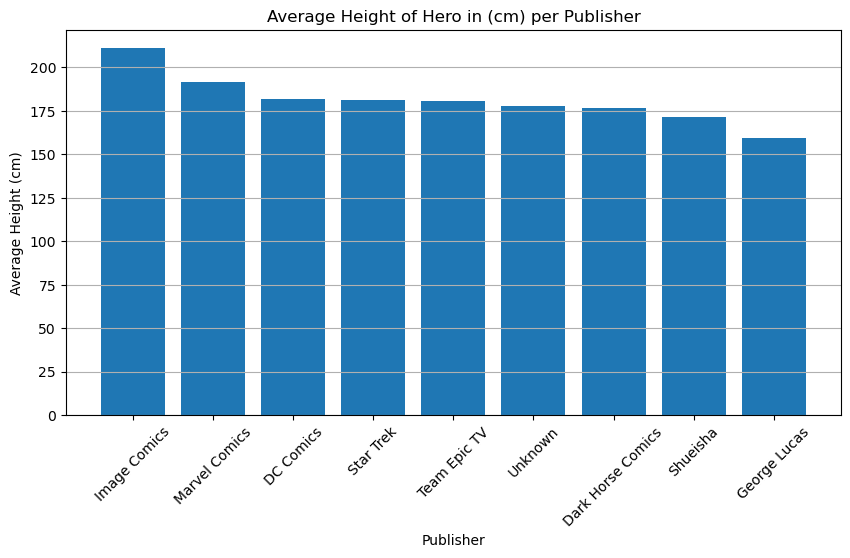

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = plt.bar(pub_height.index, pub_height.values)
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.xlabel('Publisher')
plt.ylabel('Average Height (cm)')
plt.title('Average Height of Hero in (cm) per Publisher');